# Importing Dependencies

In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import rotate

import os
import random
from random import shuffle
from PIL import Image

from sklearn.utils import shuffle

# Model Making Essentials
import tensorflow as tf
from keras import backend as K
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import TensorBoard,ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,CSVLogger
from tensorflow.keras.utils import plot_model

# Model Tuning Essentials
from keras.losses import categorical_crossentropy
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

from keras.preprocessing import image
from tqdm import tqdm
import zipfile

# Data Directories and File Paths

In [59]:
# the 4 type of directories available on the dataset
# path of the directories
trainInputHeavyFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_train_Heavy/rain/X2/'
trainOutputHeavyFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_train_Heavy/norain/'

testInputHeavyFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_test_Heavy/rain/X2/'
testOutputHeavyFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_test_Heavy/norain/'

trainInputLightFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_train_Light/rain/'
trainOutputLightFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_train_Light/norain/'

testInputLightFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_test_Light/rain/X2/'
testOutputLightFolderPath='../input/jrdr-deraining-dataset/JRDR/rain_data_test_Light/norain/'

# Names of Images

In [60]:
# List of all the names of the Train Lensed images
trainInputHeavyFiles=os.listdir(trainInputHeavyFolderPath)
trainOutputHeavyFiles=os.listdir(trainOutputHeavyFolderPath)

trainInputLightFiles=os.listdir(trainInputLightFolderPath)
trainOutputLightFiles=os.listdir(trainOutputLightFolderPath)

testInputHeavyFiles=os.listdir(testInputHeavyFolderPath)
testOutputHeavyFiles=os.listdir(testOutputHeavyFolderPath)

testInputLightFiles=os.listdir(testInputLightFolderPath)
testOutputLightFiles=os.listdir(testOutputLightFolderPath)

# Print FileNames

In [61]:
def printFileNames(st,folderPath,fileNames):
    print(st,":\n")
    for i in range(0,5):
        print(fileNames[i])
    print("\n")

In [62]:
printFileNames("trainInputHeavyFiles",trainInputHeavyFolderPath,trainInputHeavyFiles)
printFileNames("trainOutputHeavyFiles",trainOutputHeavyFolderPath,trainOutputHeavyFiles)
printFileNames("trainInputLightFiles",trainInputLightFolderPath,trainInputLightFiles)
printFileNames("trainOutputLightFiles",trainOutputLightFolderPath,trainOutputLightFiles)
printFileNames("testInputHeavyFiles",testInputHeavyFolderPath,testInputHeavyFiles)
printFileNames("testOutputHeavyFiles",testOutputHeavyFolderPath,testOutputHeavyFiles)
printFileNames("testInputLightFiles",testInputLightFolderPath,testInputLightFiles)
printFileNames("testOutputLightFiles",testOutputLightFolderPath,testOutputLightFiles)

trainInputHeavyFiles :

norain-809x2.png
norain-1193x2.png
norain-40x2.png
norain-461x2.png
norain-582x2.png


trainOutputHeavyFiles :

norain-785.png
norain-1222.png
norain-958.png
norain-773.png
norain-425.png


trainInputLightFiles :

norain-809x2.png
norain-1193x2.png
norain-40x2.png
norain-461x2.png
norain-582x2.png


trainOutputLightFiles :

norain-785.png
norain-1222.png
norain-958.png
norain-773.png
norain-425.png


testInputHeavyFiles :

norain-40x2.png
norain-39x2.png
norain-58x2.png
norain-191x2.png
norain-169x2.png


testOutputHeavyFiles :

norain-49.png
norain-21.png
norain-156.png
norain-85.png
norain-6.png


testInputLightFiles :

norain-40x2.png
norain-39x2.png
norain-58x2.png
norain-191x2.png
norain-169x2.png


testOutputLightFiles :

norain-49.png
norain-21.png
norain-156.png
norain-85.png
norain-6.png




In [63]:
print(len(trainInputHeavyFiles),len(trainOutputHeavyFiles))
print(len(trainInputLightFiles),len(trainOutputLightFiles))

print(len(testInputHeavyFiles),len(testOutputHeavyFiles))
print(len(testInputLightFiles),len(testOutputLightFiles))

1800 1800
1800 1800
200 200
200 200


# Cleaning File Names

In [64]:
def cleanFileNames(fileNames,x):
    newFiles=[]
    
    for i in range(0,len(fileNames)):
        newFiles.append(fileNames[i][0:x])
    
    newFiles.sort()
    return newFiles

In [65]:
# List of all the names of the Train Lensed images
trainInputHeavyFiles=cleanFileNames(trainInputHeavyFiles,-6)
trainOutputHeavyFiles=cleanFileNames(trainOutputHeavyFiles,-4)

trainInputLightFiles=cleanFileNames(trainInputLightFiles,-6)
trainOutputLightFiles=cleanFileNames(trainOutputLightFiles,-4)

testInputHeavyFiles=cleanFileNames(testInputHeavyFiles,-6)
testOutputHeavyFiles=cleanFileNames(testOutputHeavyFiles,-4)

testInputLightFiles=cleanFileNames(testInputLightFiles,-6)
testOutputLightFiles=cleanFileNames(testOutputLightFiles,-4)

In [66]:
printFileNames("trainInputHeavyFiles",trainInputHeavyFolderPath,trainInputHeavyFiles)
printFileNames("trainOutputHeavyFiles",trainOutputHeavyFolderPath,trainOutputHeavyFiles)
printFileNames("trainInputLightFiles",trainInputLightFolderPath,trainInputLightFiles)
printFileNames("trainOutputLightFiles",trainOutputLightFolderPath,trainOutputLightFiles)
printFileNames("testInputHeavyFiles",testInputHeavyFolderPath,testInputHeavyFiles)
printFileNames("testOutputHeavyFiles",testOutputHeavyFolderPath,testOutputHeavyFiles)
printFileNames("testInputLightFiles",testInputLightFolderPath,testInputLightFiles)
printFileNames("testOutputLightFiles",testOutputLightFolderPath,testOutputLightFiles)

trainInputHeavyFiles :

norain-1
norain-10
norain-100
norain-1000
norain-1001


trainOutputHeavyFiles :

norain-1
norain-10
norain-100
norain-1000
norain-1001


trainInputLightFiles :

norain-1
norain-10
norain-100
norain-1000
norain-1001


trainOutputLightFiles :

norain-1
norain-10
norain-100
norain-1000
norain-1001


testInputHeavyFiles :

norain-1
norain-10
norain-100
norain-101
norain-102


testOutputHeavyFiles :

norain-1
norain-10
norain-100
norain-101
norain-102


testInputLightFiles :

norain-1
norain-10
norain-100
norain-101
norain-102


testOutputLightFiles :

norain-1
norain-10
norain-100
norain-101
norain-102




In [67]:
trainFileNames=trainInputHeavyFiles
testFileNames=testInputHeavyFiles

print(len(trainFileNames)," ",len(testFileNames))

1800   200


# Validation Files

In [68]:
random.shuffle(trainFileNames)
valFileNames=trainFileNames[0:180]
trainFileNames=trainFileNames[179:-1]
print(len(valFileNames)," ",len(trainFileNames))

180   1620


In [69]:
def loadImage(path):
    try:
        img=Image.open(path)
        img=img.resize((300,300),Image.ANTIALIAS)
        img=np.array(img)/255
    except:
        return 0
    return img

In [70]:
def printImage(img):
    plt.imshow(img)
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  after removing the cwd from sys.path.


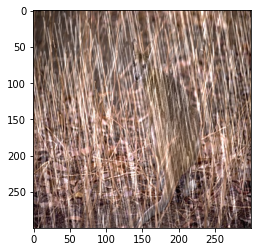

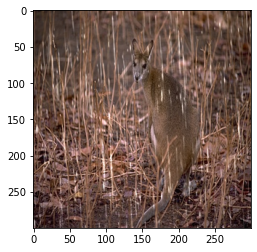

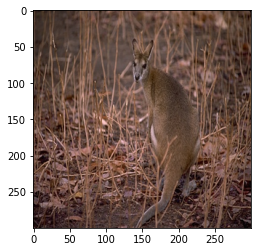

In [71]:
printImage(loadImage(trainInputHeavyFolderPath+trainFileNames[10]+"x2.png"))
printImage(loadImage(trainInputLightFolderPath+trainFileNames[10]+"x2.png"))
printImage(loadImage(trainOutputHeavyFolderPath+trainFileNames[10]+".png"))

# Data Generator Function

In [72]:
def Generator(fileNames, batchSize=32):
    filesLen=len(fileNames)
    
    while True:
        random.shuffle(fileNames)
        
        for startInd in range(0,filesLen,batchSize):
            batchSamples=fileNames[startInd:startInd+batchSize]
            x=[]
            y=[]
            
            for sampleFileName in batchSamples:
                x1FilePath=trainInputHeavyFolderPath+sampleFileName+"x2.png"
                x2FilePath=trainInputLightFolderPath+sampleFileName+"x2.png"
                
                y1FilePath=trainOutputHeavyFolderPath+sampleFileName+".png"
                y2FilePath=trainOutputLightFolderPath+sampleFileName+".png"
                
                x1=Image.open(x1FilePath)
                x1=x1.resize((300,300),Image.ANTIALIAS)
                y1=Image.open(y1FilePath)
                y1=y1.resize((300,300),Image.ANTIALIAS)
                
                x1=np.array(x1)
                y1=np.array(y1)
                
                x.append(x1)
                y.append(y1)
                
                # Horizontally Flipped
                x2=np.fliplr(x1)
                y2=np.fliplr(y1)
                    
                x.append(x2)
                y.append(y2)
                
                # Vertically Flipped
                x3=np.flipud(x1)
                y3=np.flipud(y1)
                    
                x.append(x3)
                y.append(y3)
                
                x4=np.flipud(np.fliplr(x1))
                y4=np.flipud(np.fliplr(x1))
                
                x.append(x4)
                y.append(y4)
                
                x1=Image.open(x2FilePath)
                x1=x1.resize((300,300),Image.ANTIALIAS)
                y1=Image.open(y2FilePath)
                y1=y1.resize((300,300),Image.ANTIALIAS)
                
                x1=np.array(x1)
                y1=np.array(y1)
                
                x.append(x1)
                y.append(y1)
                
                # Horizontally Flipped
                x2=np.fliplr(x1)
                y2=np.fliplr(y1)
                    
                x.append(x2)
                y.append(y2)
                    
                # Vertically Flipped
                x3=np.flipud(x1)
                y3=np.flipud(y1)
                
                x.append(x3)
                y.append(y3)
                
                x4=np.flipud(np.fliplr(x1))
                y4=np.flipud(np.fliplr(x1))
                
                x.append(x4)
                y.append(y4)
                
            x=np.array(x)
            y=np.array(y)
            
            yield x,y

# Data Generator Objects

In [73]:
print(type(trainFileNames)," ",type(valFileNames))
trainDataGen=Generator(trainFileNames,1)
valDataGen=Generator(valFileNames,1)

<class 'list'>   <class 'list'>


In [75]:
# Samples
x,y=next(trainDataGen)
print(x.shape," ",y.shape)

(8, 300, 300, 3)   (8, 300, 300, 3)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


In [ ]:
for i in range(0,len(x)):
    printImage(x[i])
    printImage(y[i])

In [76]:
# Samples
x,y=next(valDataGen)
print(x.shape," ",y.shape)

(8, 300, 300, 3)   (8, 300, 300, 3)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


In [ ]:
for i in range(0,len(x)):
    printImage(x[i])
    printImage(y[i])

# Loss Functions

In [77]:
def psnrLoss(yTrue,yPred):
    yTrue=yTrue/255
    yPred=yPred/255
    return tf.image.psnr(yTrue,yPred,1.0)

def ssimLoss(yTrue,yPred):
    yTrue=yTrue/255
    yPred=yPred/255
    return 1-tf.reduce_mean(tf.image.ssim(yTrue,yPred,1.0))

# Custom Activation Function

In [78]:
def customSigmoid(x):
    return 256*K.sigmoid(x)

# Model Training

In [79]:
def createModel():
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),input_shape=(300,300,3),strides=(1,1),padding="valid",activation='linear'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=random.uniform(0.1,0.35)))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(128,(2,2),strides=(1,1),padding="valid"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=random.uniform(0.1,0.4)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    
    model.add(Conv2D(256,(2,2),strides=(1,1),padding="valid"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=random.uniform(0.1,0.3)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    
    model.add(Conv2D(512,(2,2),strides=(1,1),padding="valid"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=random.uniform(0.1,0.26)))
    
    model.add(Conv2DTranspose(512,(2,2),strides=(1,1),padding="valid"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=random.uniform(0.1,0.3)))
    model.add(UpSampling2D(size=(2,2)))

    model.add(Conv2DTranspose(256,(2,2),strides=(1,1),padding="valid"))
    model.add(Conv2DTranspose(256,(2,2),strides=(1,1),padding="valid"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=random.uniform(0.1,0.35)))
    model.add(UpSampling2D(size=(2,2)))

    model.add(Conv2DTranspose(128,(2,2),strides=(1,1),padding="valid"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=random.uniform(0.1,0.32)))
    model.add(UpSampling2D(size=(2,2)))

    model.add(Conv2DTranspose(3,(3,3),strides=(1,1),padding="valid",activation='relu'))
    model.compile(loss='mse',optimizer='Adam',metrics=['mse',ssimLoss,psnrLoss])
    
    return model

# Callbacks and ModelChecker

In [80]:
trainDataGen=Generator(trainFileNames,5)
valDataGen=Generator(valFileNames,5)
modelName="EncoderDecoder.hdf5"
model=createModel()
Patience=10

checkPointer=ModelCheckpoint(filepath=modelName,save_best_only=True,save_weights_only=False)
tensorBoard=TensorBoard(log_dir='./models/logs')
earlyStopper=EarlyStopping(monitor='val_loss',mode='min',patience=Patience)

# All CallBacks
callBacks=[tensorBoard,checkPointer,earlyStopper]
model.summary()

2022-06-26 10:17:19.827448: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-26 10:17:19.827496: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 298, 298, 64)      256       
_________________________________________________________________
activation_7 (Activation)    (None, 298, 298, 64)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 298, 298, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 128)     32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 148, 148, 128)    

2022-06-26 10:17:20.111451: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-26 10:17:20.111630: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [81]:
x,y=next(trainDataGen)
print(x.shape," ",y.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


(40, 300, 300, 3)   (40, 300, 300, 3)


# Plotting Function as Training Progresses

In [82]:
# Plots the train/val categorical loss and accuracy on two different plots
def plotTraining(history):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['ssimLoss','val_ssimLoss'])
    
    axes[1].plot(history.history['psnrLoss'])   
    axes[1].plot(history.history['val_psnrLoss'])
    axes[1].legend(['psnrLoss','val_psnrLoss'])

In [ ]:
history=model.fit_generator(generator=trainDataGen,steps_per_epoch=200,epochs=80,verbose=1,callbacks=callBacks,validation_data=valDataGen,validation_steps=36)

In [ ]:
plotTraining(history)

# Load Weights

In [84]:
model.load_weights('./EncoderDecoder.hdf5')

# Test Resuts

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


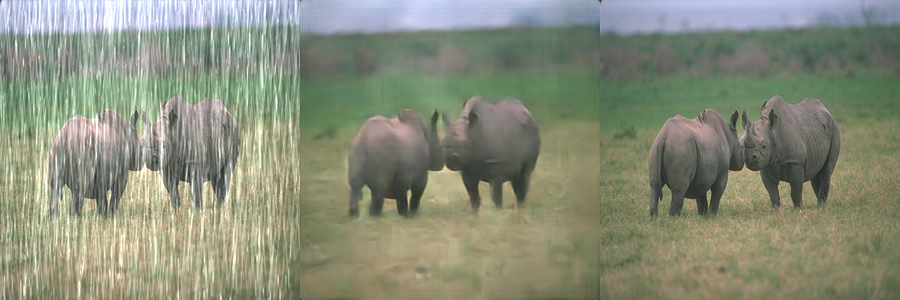

<Resampling.LANCZOS: 1>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


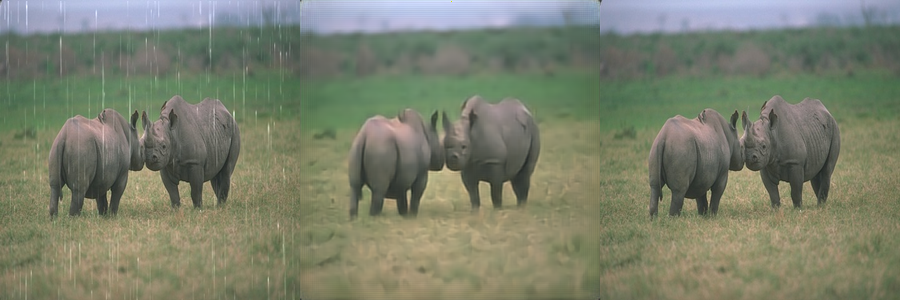

<Resampling.LANCZOS: 1>

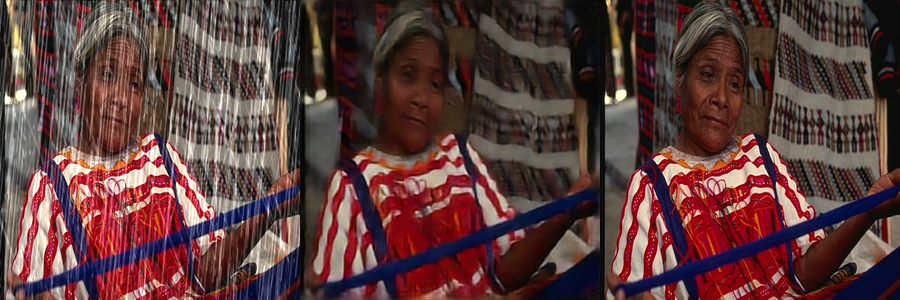

<Resampling.LANCZOS: 1>

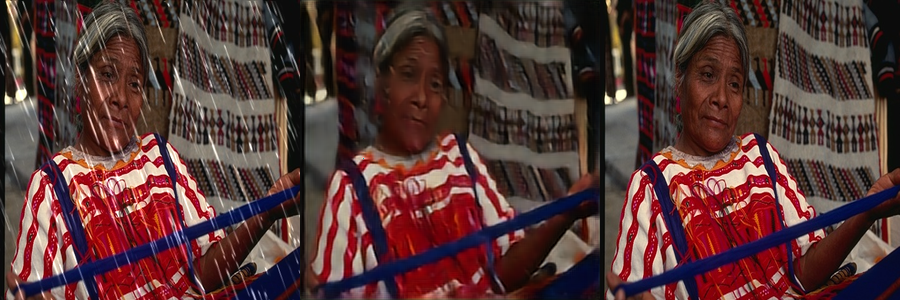

<Resampling.LANCZOS: 1>

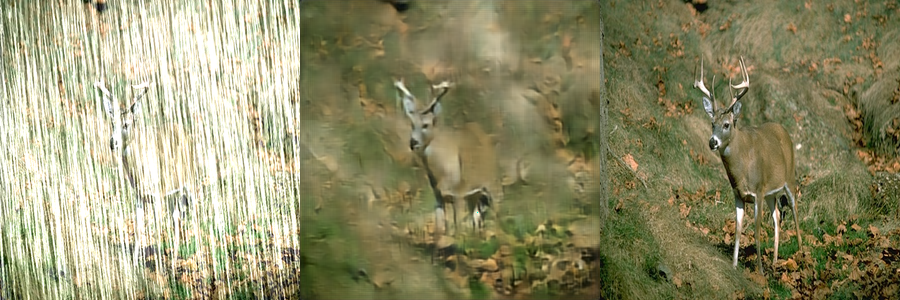

<Resampling.LANCZOS: 1>

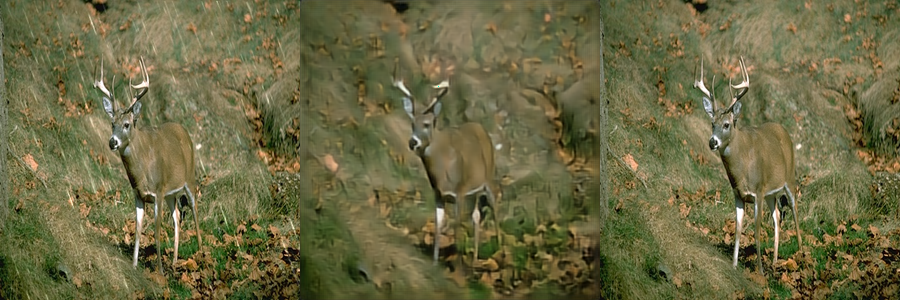

<Resampling.LANCZOS: 1>

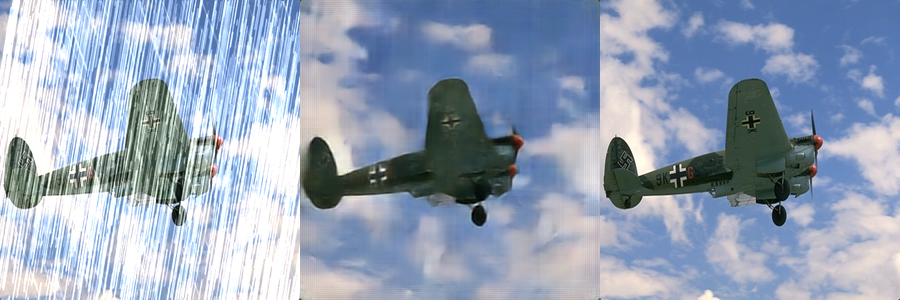

<Resampling.LANCZOS: 1>

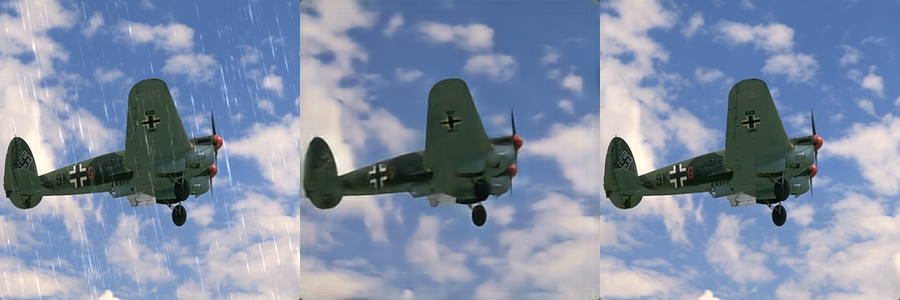

<Resampling.LANCZOS: 1>

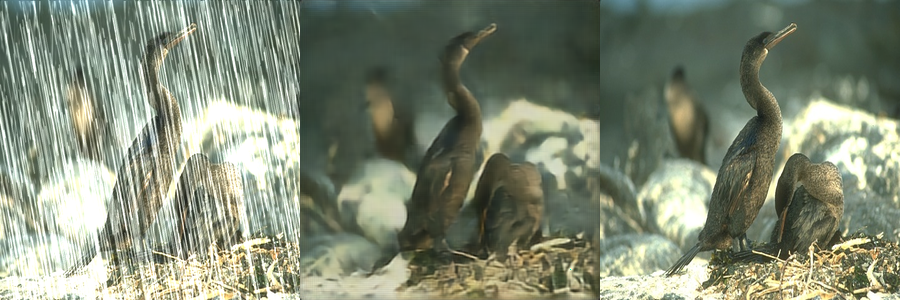

<Resampling.LANCZOS: 1>

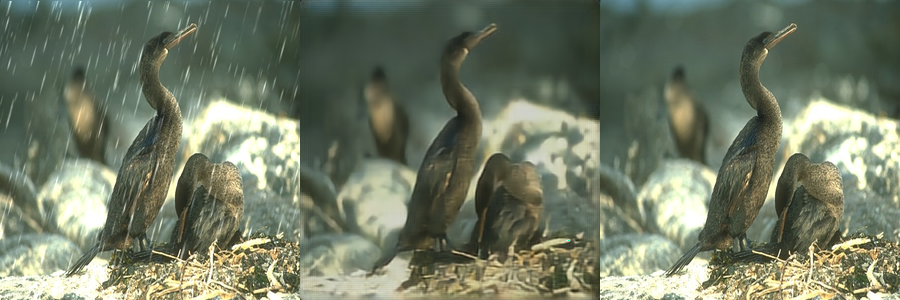

<Resampling.LANCZOS: 1>

In [85]:
for i in range(0,5):
    ind=random.randint(0,len(testFileNames))
    
    testFile=testFileNames[ind]
    
    x1FilePath=testInputHeavyFolderPath+testFile+"x2.png"
    y1FilePath=testOutputHeavyFolderPath+testFile+".png"
    
    x1=Image.open(x1FilePath)
    x1=x1.resize((300,300),Image.ANTIALIAS)
    
    y1=Image.open(y1FilePath)
    y1=y1.resize((300,300),Image.ANTIALIAS)
    
    
    x1=np.array(x1)
    y1=np.array(y1)
    
    x1=x1.reshape(1,300,300,3)
    
    x1Pred=model.predict(x1)
    mx=max(0.1,np.amax(x1Pred))
    x1Pred=256*(x1Pred/mx)
    
    x1Pred=x1Pred.astype(np.uint8)
    x1Pred=x1Pred.reshape(300,300,3)
    x1=x1.reshape(300,300,3)
    
    res=np.concatenate((x1,x1Pred,y1),axis=1)
    res=Image.fromarray(res,'RGB')
    display(res,Image.LANCZOS)
    
    x1FilePath=testInputLightFolderPath+testFile+"x2.png"
    y1FilePath=testOutputLightFolderPath+testFile+".png"
    
    x1=Image.open(x1FilePath)
    x1=x1.resize((300,300),Image.ANTIALIAS)
    
    y1=Image.open(y1FilePath)
    y1=y1.resize((300,300),Image.ANTIALIAS)
    
    x1=np.array(x1)
    y1=np.array(y1)
    
    x1=x1.reshape(1,300,300,3)
    
    x1Pred=model.predict(x1)
    mx=max(0.1,np.amax(x1Pred))
    x1Pred=256*(x1Pred/mx)
    
    x1Pred=x1Pred.astype(np.uint8)
    x1Pred=x1Pred.reshape(300,300,3)
    x1=x1.reshape(300,300,3)
    
    res=np.concatenate((x1,x1Pred,y1),axis=1)
    res=Image.fromarray(res,'RGB')
    display(res,Image.LANCZOS)

In [ ]:
print('chask')